In [1]:
from trapping import Hartree, ImportModel, compare_models, compare_spectra
import plotly.express as px

# Hartree code

The evolution for a given set of parameters can be obtained by calling the `Hartree` class, passing it the parameters either as a dictionary or a list ($\lambda$ is always referred to as `lamb` just to not accidentally mix it up with python's lambda function anywhere).

In [2]:
parameters = {"log10Omega" : -5, "log10g": -1, "lamb": 1., "f": 5.e-7}
model = Hartree(parameters)

  0%|          | 0/2000 [00:00<?, ?it/s]

The zero crossing data is stored in variable `data` as a pandas dataframe.

In [3]:
model.data

,tau,t,phi,phi_dot,loga,chi2
0,-10.002897,0.000000e+00,-0.000236,5.591789e-11,0.000000e+00,0.000000e+00
1,-9.992894,4.230710e+03,-0.000236,5.591788e-11,9.658074e-08,-8.507583e-18
2,-9.982891,8.461420e+03,-0.000236,5.591786e-11,1.931614e-07,-1.668800e-17
3,-9.972888,1.269213e+04,-0.000236,5.591784e-11,2.897419e-07,-2.421649e-17
4,-9.962885,1.692284e+04,-0.000236,5.591783e-11,3.863224e-07,-3.079258e-17
...,...,...,...,...,...,...
1996,9.962885,8.444497e+06,0.000236,5.586077e-11,1.927080e-04,3.710862e-15
1997,9.972888,8.448728e+06,0.000236,5.586071e-11,1.928045e-04,4.043215e-15
1998,9.982891,8.452959e+06,0.000236,5.586066e-11,1.929011e-04,4.313036e-15
1999,9.992894,8.457190e+06,0.000236,5.586060e-11,1.929976e-04,4.509518e-15


### Turning point

By default the model only calculates the zero-crossing. The subsequent evolution can be calculated by invoking the `calculate_turn()` method. This is so that, for example, you could swich expansion on or off just for the evolution after the zero-crossing. After this method is invoked, the evolution data is stored in the `turn_data` variable. Method `calculate_turn()` also returns the results `[(Phi1,loga1), data]`.

In [4]:
model.calculate_turn()
model.turn_data

,tau,t,phi,phi_dot,loga
0,10.004345,8.461420e+06,0.000236,5.586054e-11,0.000193
1,57.316551,2.846915e+07,0.001352,5.567269e-11,0.000649
2,104.628758,4.847688e+07,0.002464,5.548544e-11,0.001104
3,151.940964,6.848461e+07,0.003573,5.529877e-11,0.001557
4,199.253170,8.849234e+07,0.004677,5.511269e-11,0.002010
...,...,...,...,...,...
996,47132.961798,1.993616e+10,0.096771,-2.471260e-11,0.268976
997,47180.274004,1.995617e+10,0.096276,-2.474474e-11,0.269214
998,47227.586210,1.997618e+10,0.095781,-2.477683e-11,0.269453
999,47274.898416,1.999618e+10,0.095285,-2.480886e-11,0.269691


### Quick plots

You can quickly plot $\langle \chi^2\rangle$ and $\phi$ by using the inbuilt `plot()` method. The black dashed line represents $f^2/3$ and the shaded region is the tachyonic window.

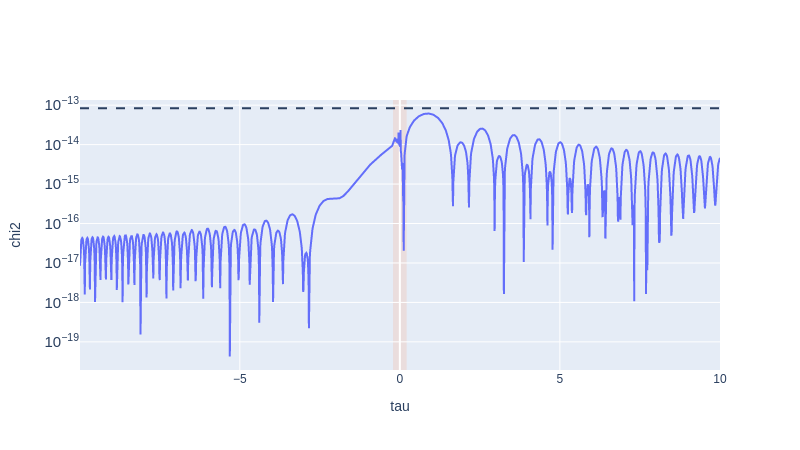

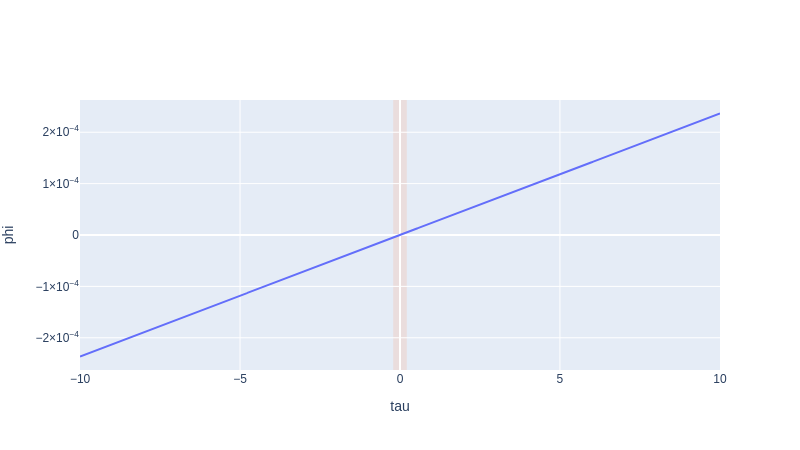

In [5]:
model.plot(format='png')

You can get more details about the run with the `report()` method.

Model: log10Omega=-5, log10g=-1, lamb=1.0, f=5e-07

Expansion: yes
Self-interaction: yes
Vacuum subtraction: yes


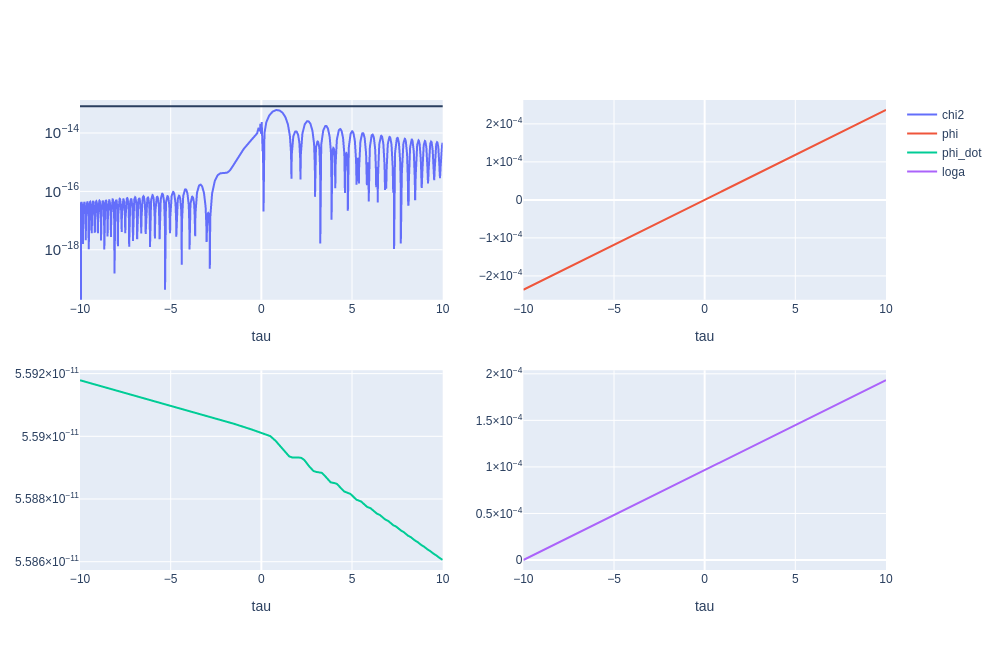

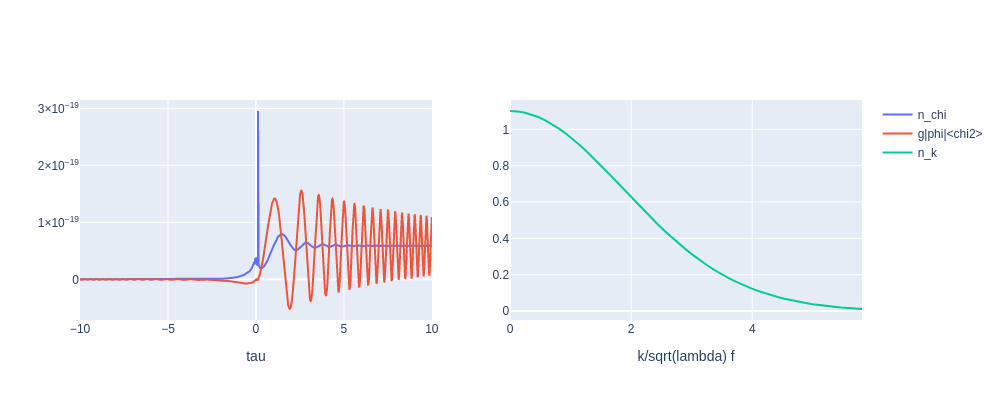

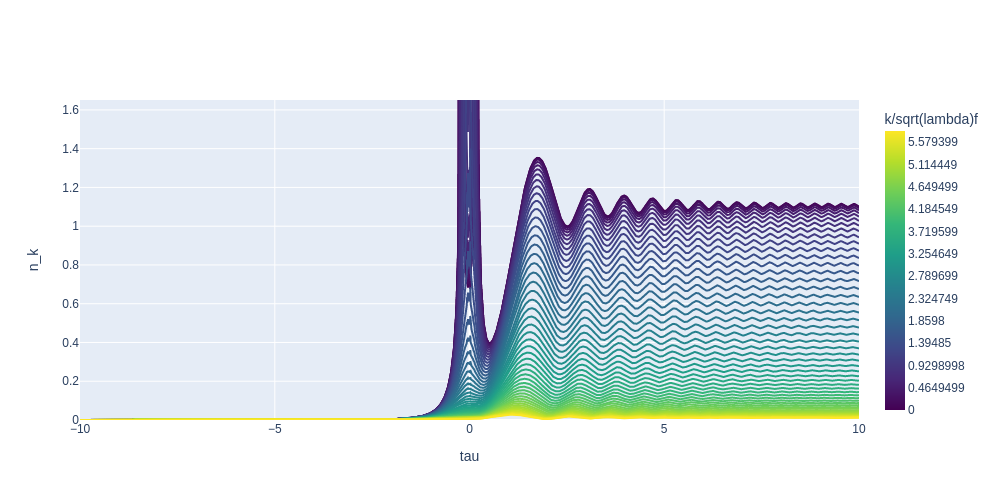

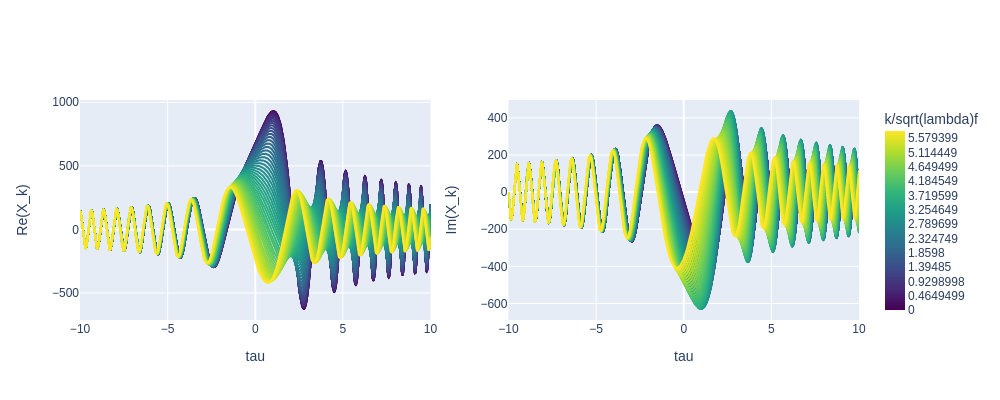

In [6]:
model.report(format='png')

### Options

By default the model includes expansion, self-interaction, and vacuum substraction. You can turn any of these off with corresponding keyword arguments. You can plot several models in one figure with the `compare_models` function: 

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

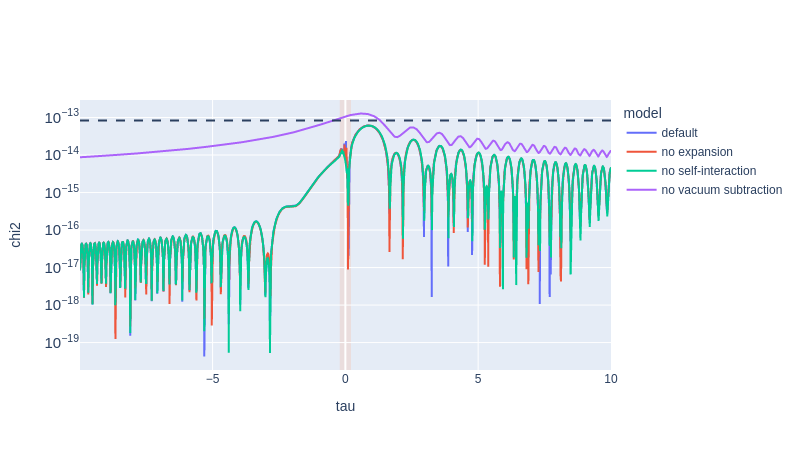

In [7]:
no_expansion = Hartree(parameters, expansion=False)
no_self_interaction = Hartree(parameters, self_interaction=False)
no_vacuum_subtraction = Hartree(parameters, vacuum_subtraction=False)

legend = ["default", "no expansion","no self-interaction", "no vacuum subtraction"]
compare_models([model, no_expansion, no_self_interaction, no_vacuum_subtraction], legend=legend, legend_title="model", phi=False, format='png')

### Spectra and particles density

The spectra are stored in variable `nk` as a pivot table of $n_k(k, \tau)$ values where $k$ is in units of $\sqrt{\lambda}f$.

In [8]:
model.nk

tau,-10.002897,-9.992894,-9.982891,-9.972888,-9.962885,-9.952882,-9.942879,-9.932876,-9.922873,-9.912871,...,9.912871,9.922873,9.932876,9.942879,9.952882,9.962885,9.972888,9.982891,9.992894,10.002897
k,,,,,,,,,,,,,,,,,,,,,
0.000000,1.308652e-10,2.304086e-07,9.760041e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.112723,1.111523,1.110157,1.108680,1.107150,1.105627,1.104172,1.102842,1.101689,1.100760
0.116237,1.308631e-10,2.304055e-07,9.759920e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.110597,1.109397,1.108031,1.106555,1.105027,1.103507,1.102055,1.100728,1.099579,1.098654
0.232475,1.308569e-10,2.303963e-07,9.759558e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.104244,1.103042,1.101678,1.100206,1.098683,1.097171,1.095728,1.094413,1.093275,1.092362
0.348712,1.308467e-10,2.303810e-07,9.758954e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.093736,1.092533,1.091171,1.089705,1.088193,1.086693,1.085267,1.083969,1.082851,1.081958
0.464950,1.308322e-10,2.303595e-07,9.758108e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.079195,1.077989,1.076631,1.075174,1.073676,1.072195,1.070791,1.069518,1.068427,1.067562
0.581187,1.308138e-10,2.303319e-07,9.757020e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.060782,1.059575,1.058222,1.056778,1.055298,1.053841,1.052465,1.051224,1.050168,1.049338
0.697425,1.307913e-10,2.302982e-07,9.755691e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.038704,1.037495,1.036150,1.034720,1.033263,1.031836,1.030495,1.029293,1.028278,1.027491
0.813662,1.307646e-10,2.302583e-07,9.754121e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,1.013205,1.011996,1.010660,1.009249,1.007820,1.006427,1.005128,1.003972,1.003005,1.002267
0.929900,1.307339e-10,2.302124e-07,9.752310e-07,0.000002,0.000004,0.000006,0.000008,0.00001,0.000013,0.000015,...,0.984561,0.983353,0.982030,0.980642,0.979244,0.977893,0.976641,0.975537,0.974626,0.973942


You can also call it with specific values of `tau` or `k` to get the spectrum at specific time or evolution of occupation numbers for specific $k$ value respectively. The value doesn't have to be precise, the function will return the data for the closest existing value. Calling with no arguments `model.nk()` gives the final spectrum at the end of the zero-crossing. 

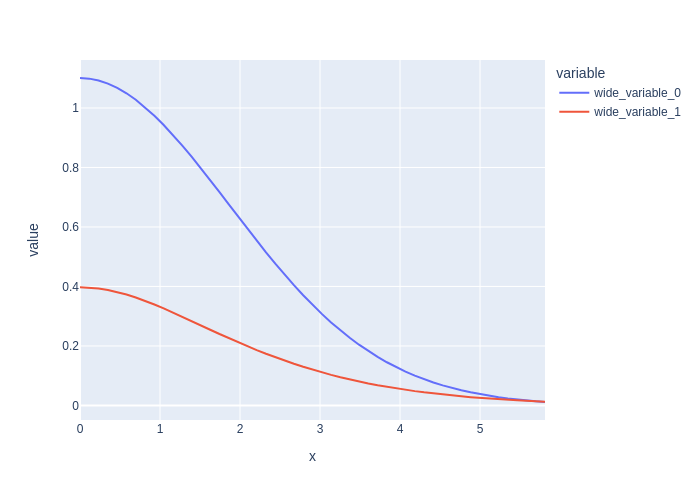

In [9]:
final_spectrum = model.nk()
intermediate_spectrum = model.nk(tau=0.5)
fig = px.line(x=model.k,y=[final_spectrum, intermediate_spectrum])
fig.show('png')

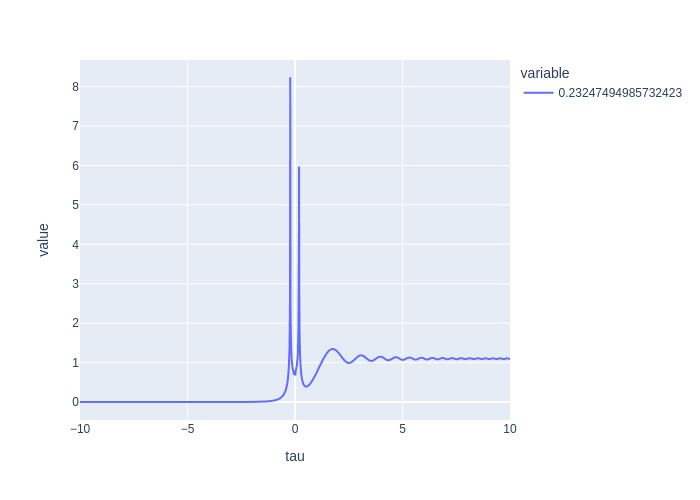

In [10]:
nk_evolution = model.nk(k=.2)
fig = px.line(nk_evolution)
fig.show('png')

The total number number density $n_\chi$ is stored in variable `n_chi`

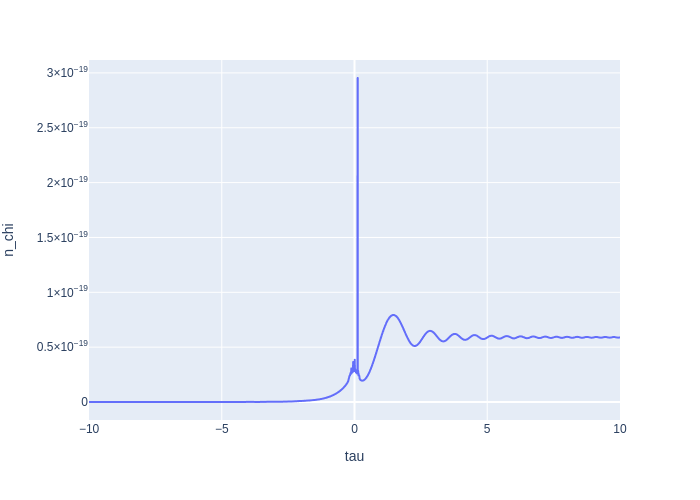

In [11]:
n_chi = model.n_chi
fig = px.line(n_chi, x="tau", y="n_chi")
fig.show('png')

### Other variables

The model also stores other variables for convenience of access. Among these:

- `parameters`: dictionary of parameter values.
- `v, g, log10Omega, log10g, lamb, f`: also separately
- `kvals`: momenta in Planck units
- `k`: momenta in units of $\sqrt{\lambda}f$
- `expansion, self_interaction, vacuum_subtraction`: booleans for whether these were turned on in the run
- `Phi1, loga1`: values of $\phi$ and $\log a$ at the turn (appear after `calculate_turn()` is run)
- `tbins`,`kbins`: resolution in time and momentum
- `tzero`: cosmic time of zero-crossing

### Saving data

You can save the model data in the TSV format by invoking the `save()` method. If turn data has been calculated for the model it will save both zero-crossing and the turn data as separate files. The file names will be of the form `zerocrossing_log10Omega=-5_log10g=-1_lambda=1.0_f=5e-07_exp_vac_self.dat` and `turn_log10Omega=-5_log10g=-1_lambda=1.0_f=5e-07_exp_vac_self.dat`. The method takes an optional argument `DIR` for the save directory, by default it's the current directory. Spectra are not saved.

In [12]:
model.save(DIR="./data")

### Importing data

Saved data can be imported with `ImportModel(file)` where `file` is either the zero-crossing or turn data. The imported model behaves in the same way as the calculated one.

In [13]:
file = "./data/zerocrossing_log10Omega=-5_log10g=-1_lambda=1.0_f=5e-07_exp_vac_self.dat"
imported_model = ImportModel(file)
imported_model.data

,tau,t,phi,phi_dot,loga,chi2
0,-10.002897,0.000000e+00,-0.000236,5.591789e-11,0.000000e+00,0.000000e+00
1,-9.992894,4.230710e+03,-0.000236,5.591788e-11,9.658074e-08,-8.507583e-18
2,-9.982891,8.461420e+03,-0.000236,5.591786e-11,1.931614e-07,-1.668800e-17
3,-9.972888,1.269213e+04,-0.000236,5.591784e-11,2.897419e-07,-2.421649e-17
4,-9.962885,1.692284e+04,-0.000236,5.591783e-11,3.863224e-07,-3.079258e-17
...,...,...,...,...,...,...
1996,9.962885,8.444497e+06,0.000236,5.586077e-11,1.927080e-04,3.710862e-15
1997,9.972888,8.448728e+06,0.000236,5.586071e-11,1.928045e-04,4.043215e-15
1998,9.982891,8.452959e+06,0.000236,5.586066e-11,1.929011e-04,4.313036e-15
1999,9.992894,8.457190e+06,0.000236,5.586060e-11,1.929976e-04,4.509518e-15


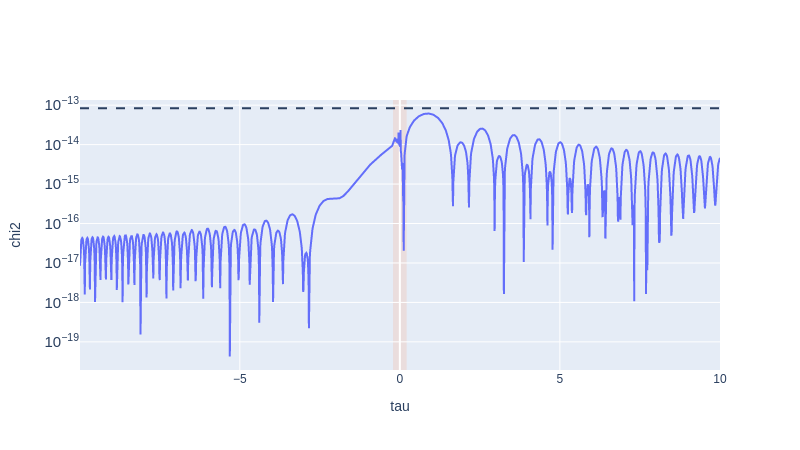

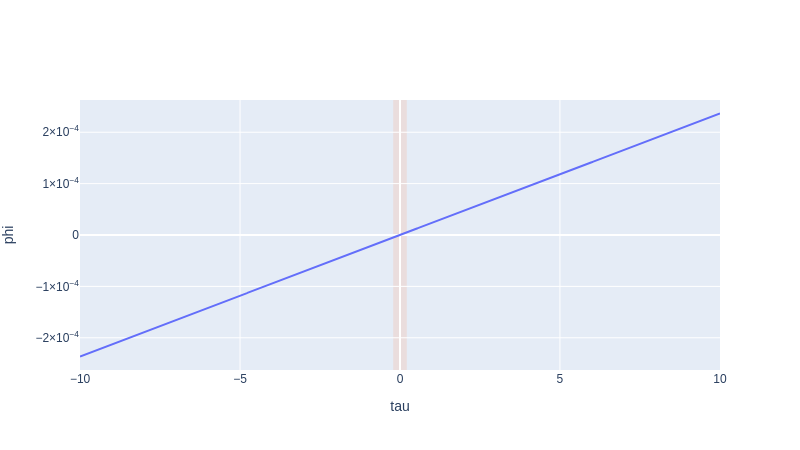

In [14]:
imported_model.plot(format='png')